By: David Santiago Flórez Alsina

-----------------


In [39]:
import plotly
import geopandas
import pandas   as pd
import numpy    as np 
import sympy    as sp
import seaborn  as sns
import plotly.express       as px
import matplotlib.pyplot    as plt
import plotly.graph_objects as go
import scipy.integrate      as integrate


from typing         import List, Tuple
from scipy.spatial  import Voronoi, voronoi_plot_2d

In [40]:
import plotly.io as pio
import plotly.offline as pyo

pio.renderers.default = 'notebook'
pyo.init_notebook_mode(connected=True)

## mausqui herramientas misteriosas

In [93]:
def norm(x):
    return sp.sqrt(np.dot(x, x).simplify())

def get_all_from_parametric_curve_with_normalizations(curve: Tuple, var: sp.Symbol):
    """
        Returns a tuple with the following elements:
        - da: first derivative of the curve
        - dda: second derivative of the curve
        - k: curvature of the curve
        - norm_da: norm of the first derivative of the curve
        - norm_dda: norm of the second derivative of the curve

        Input:
        ----------------------------
        - curve: tuple with the parametric curve
        - var: variable of the parametric curve
    """

    da = (sp.diff(curve[0], var), sp.diff(curve[1], var), sp.diff(curve[2], var))
    dda = (sp.diff(curve[0], var, 2), sp.diff(curve[1], var, 2), sp.diff(curve[2], var, 2))
    ddda = (sp.diff(curve[0], var, 3), sp.diff(curve[1], var, 3), sp.diff(curve[2], var, 3))
    norm_da = norm(da)
    norm_dda = norm(dda)

    binorm_vec = np.cross(da, dda)
    binom_vec_norm = norm(binorm_vec)
    k = binom_vec_norm / (norm_da**3)

    unit_da = (da[0]/norm(da), da[1]/norm(da), da[2]/norm(da))
    unit_dda = (dda[0]/norm(dda), dda[1]/norm(dda), dda[2]/norm(dda))
    unit_binorm_vec = (binorm_vec[0]/norm(binorm_vec), binorm_vec[1]/norm(binorm_vec), binorm_vec[2]/norm(binorm_vec))

    #torsion = np.dot(unit_binorm_vec, unit_dda).simplify()
    torsion = np.dot( np.cross(da, dda), dda).simplify() / (norm(np.cross(da, dda))**2).simplify()

    return {'da':               da,
            'dda':              dda,
            'binorm_vec':       binorm_vec,
            'k':                k,
            'torsion':          torsion,
            'norm_da':          norm_da,
            'norm_dda':         norm_dda, 
            'binom_vec_norm':   binom_vec_norm, 
            'unit_da':          unit_da,
            'unit_dda':         unit_dda,
            'unit_binorm_vec':  unit_binorm_vec}

In [42]:
def check_if_curve_is_regular(norm_da, vars):
    """
        Returns True if the curve is regular, False otherwise.

        Input:
        ----------------------------
        - da: first derivative of the curve
    """

    #find roots of norm_da function if any
    roots = sp.solve(norm_da, vars)

    #if there are no roots, the curve is regular
    if len(roots) == 0:
        return True
    else:
        return False


In [43]:
def calculate_rotation_index_from_non_parametric(k, da_norm, var, start, end):
    """
        Returns the rotation index of a non-parametric curve.
    """
    rotation_index = sp.integrate(k*da_norm, (var, start, end))*(1/(2*sp.pi))
    return rotation_index.simplify()

def calculate_rotation_index_from_non_parametric_numeric(k, da_norm, var, start, end):
    """
        Returns the rotation index of a non-parametric curve.
        By using numeric integration.
    """

    integration_fn = lambda x: k(x)*da_norm(x)

    rotation_index = integrate.quad(integration_fn, start, end)
    return rotation_index

In [44]:
def calculate_rotation_index_from_parametric(k, var, start, end):
    """
        Returns the rotation index of parametric curve
    """
    rotation_index = sp.integrate(k, (var, start, end))*(1/(2*sp.pi))
    return rotation_index.simplify()

def calculate_rotation_index_from_parametric_numeric(k, var, start, end):
    """
        Returns the rotation index of parametric curve
        By using numeric integration.
    """
    integration_fn = lambda x: k(x)
    rotation_index = integrate.quad(integration_fn, start, end)

    return rotation_index

In [45]:
def calculate_curve_length(delta_curve_norm, var, start, end):
    """
        Returns the length of a curve
    """
    
    curve_length = sp.integrate(delta_curve_norm, (var, start, end))
    return curve_length.simplify()

In [46]:
def plot_arrow_plotly(start_point: np.array, endpoint: np.array) -> go.Figure:

    fig = go.Figure(data=[
                    go.Cone(
                        x=[endpoint[0]],
                        y=[endpoint[1]],
                        z=[endpoint[2]],
                        u=[endpoint[0] - start_point[0]],
                        v=[endpoint[1] - start_point[1]],
                        w=[endpoint[2] - start_point[2]],
                        colorscale='Blues',
                        sizemode="absolute",
                        sizeref=0.5
                    ), 

                    go.Scatter3d(
                        x=[start_point[0], endpoint[0]],
                        y=[start_point[1], endpoint[1]],
                        z=[start_point[2], endpoint[2]],
                        mode='lines',
                        line=dict(
                            color='red',
                            width=4
                        )
                    )
                ])
    
    return fig

Read the data in the link cancer2.csv. This file has measurements of tumor cells; these are diag-
nosed as benign or malignant cells for each case. The scatter plot for the variables “Perimetro”
and “Concavidad” is on the previous page.

# Point 1 
(1 point) Implement the 2D Range Searching algorithm to run a query of the interval
[1000 : 3000] × [500 : 1500] for the variables “Concavidad” and “Perimetro”. Print the
cell IDs for the results of the 2D query. You should implement the algorithm shown in
class; the use of a common filter or a conditional is not the right answer.
Do a scatterplot where points in the query have a different color from those which are
out of the query.


------------------
Sometimes, when mechanics fail, flights have to follow an emergency protocol, which includes
landing at the nearest airport. In such cases, knowledge about the Voronoi diagram associated
with the airports is crucial, and according to that, the pilot could update the flight plan by
searching for a faster landing.

Read the data in the link airports CO.csv. This file has coordinates of airports in Colombia.

# Point 2

(0.8 points) Use the libraries Voronoi and voronoi plot 2d and plot the Voronoi diagram
associated with Colombian airports on the map as shown in the figure. It could be useful
for you to explore the links: Voronoi KMeans and Mapas.


In [47]:
airports = pd.read_csv('airports_CO.csv')
airports.head()

,Latitud,Longitud,Altitud,Ciudad,Departamento,Aeropuerto
0,4.244800,-74.649886,492.861639,Melgar,Tolima,Tolemaida Air Base
1,4.216442,-74.635047,313.334425,Melgar,Tolima,Melgar Ab Airport
2,7.927567,-72.511547,334.060826,Cucuta,NorteDeSantander,Camilo Daza Airport
3,4.701594,-74.146947,2548.432820,Bogota,DistritoCapital,Eldorado International Airport
4,5.432780,-71.662500,197.815200,Trinidad,Casanare,Trinidad Airport


We import the map of Colombia

In [48]:
url='https://gist.githubusercontent.com/john-guerra/43c7656821069d00dcbc/raw/3aadedf47badbdac823b00dbe259f6bc6d9e1899/colombia.geo.json'
col = geopandas.read_file(url)
col.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,"POLYGON ((-76.30730 8.61930, -76.29810 8.61640..."
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,"POLYGON ((-74.87060 10.36120, -74.87640 10.343..."
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,"POLYGON ((-74.02290 4.79510, -74.02640 4.78360..."
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15950 10.42360, -75.15430 10.409..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.21300 7.02750, -72.20610 7.02460..."


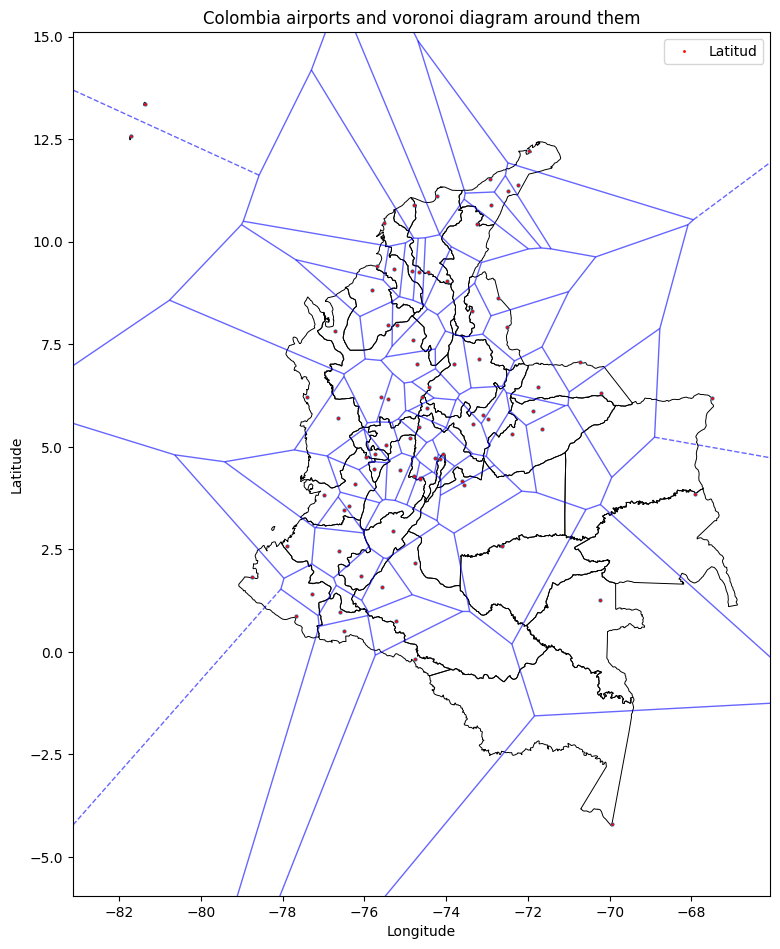

In [49]:
points = airports[['Longitud', 'Latitud']].values
vor = Voronoi(points)

#plotting the colombia map 
fig, ax = plt.subplots(figsize=(9, 16))
col.boundary.plot(ax=ax, color='black', linewidth=0.7)

#plotting the voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='blue', line_width=1, line_alpha=0.6, point_size=4)

#plotting the airports
airports.plot(x='Longitud', y='Latitud', ax=ax, color='red', markersize=1, style='o')

#adding titles and labels
plt.title('Colombia airports and voronoi diagram around them')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

------------------
# Point 3

(0.8 points) Consider the curve:

$$\alpha(t) = (cos(3t) cos(t),\; cos(3t) sin(t),\; 0),\;\; t \in [0, \pi]$$

### Point 3.1

- Plot the curve $\alpha(t)$  with the tangent vector at $t = 0$.

In [50]:
t     = sp.Symbol('t', real=True)
start = 0
end   = np.pi

# Parametric curve
alpha = (sp.cos(3*t)*sp.cos(t), sp.cos(3*t)*sp.sin(t), 0)
alpha

(cos(t)*cos(3*t), sin(t)*cos(3*t), 0)

Get some extra information about the curve $\alpha(t)$

In [51]:
info = get_all_from_parametric_curve_with_normalizations(alpha, t)
da_alpha = info['da']
da_alpha

(-sin(t)*cos(3*t) - 3*sin(3*t)*cos(t), -3*sin(t)*sin(3*t) + cos(t)*cos(3*t), 0)

In [52]:
# interval of the parameter t
t_vals = np.linspace(start, end, 100)

# lambdify the parametric curve
alpha_fn = sp.lambdify(t, alpha, 'numpy')
da_alpha_fn = sp.lambdify(t, da_alpha, 'numpy')

# evaluate the parametric curve
alpha_vals = alpha_fn(t_vals)

In [53]:
# add the tangent vector at t=0
tangent_vector = np.array(da_alpha_fn(0))
tangent_vector_start = np.array(alpha_fn(0))
fig = plot_arrow_plotly(tangent_vector_start, tangent_vector + tangent_vector_start)

# 3D plot of the parametric curve, as a line, colored as a parameter of t 
# with the colorbar showing the values of t
fig.add_trace(go.Scatter3d(x=alpha_vals[0],
                           y=alpha_vals[1],
                           z=np.zeros_like(alpha_vals[1]),
                           marker=dict(size=4,
                                       color=t_vals,
                                       colorscale='inferno',),
                           line=dict(color=t_vals,
                                     colorscale='inferno',
                                     width=2), 
                          ))

fig.update_layout(title='Parametric curve',
                  scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='z'), 
                  width=800,
                  height=800, 
                  margin=dict(l=65, r=50, b=65, t=90), 
                  scene_aspectmode='cube',)

### Point 3.2
- Plot the curvature $\kappa(t)$. 

In [54]:
curvature = info['k']
curvature

2*Abs(64*sin(t)**6 - 96*sin(t)**4 + 36*sin(t)**2 + 5)/(128*sin(t)**6 - 192*sin(t)**4 + 72*sin(t)**2 + 1)**(3/2)

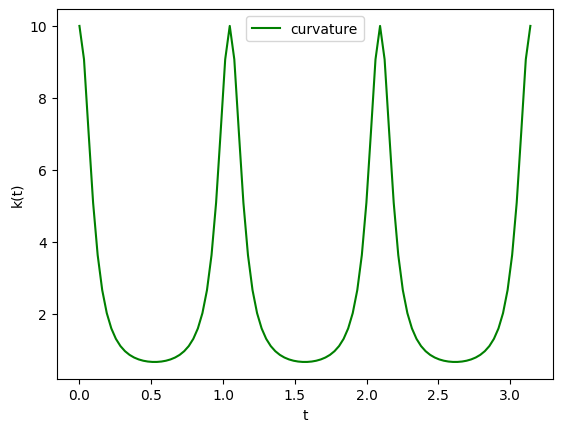

In [55]:
curvature_fn = sp.lambdify(t, curvature, 'numpy')
curvature_vals = curvature_fn(t_vals)

plt.plot(t_vals, curvature_vals, label='curvature', color='green')
plt.ylabel('k(t)')
plt.xlabel('t')
plt.legend()
plt.show()

### Point 3.3
- Evaluate the curve’s length.

In [56]:
da_norm    = info['norm_da']
da_norm_fn = sp.lambdify(t, da_norm, 'numpy')
da_norm

sqrt(128*sin(t)**6 - 192*sin(t)**4 + 72*sin(t)**2 + 1)

In [57]:
curve_length = calculate_curve_length(da_norm, t, start, end)
curve_length

Integral(sqrt(128*sin(t)**6 - 192*sin(t)**4 + 72*sin(t)**2 + 1), (t, 0, 3.14159265358979))

In [58]:
curve_length.evalf()

6.68244661027763

### Point 3.4

Evaluate the rotation index. Use numerical integration if necessary. Interpret your result.

In [59]:
rotation_idx_result = calculate_rotation_index_from_non_parametric_numeric(curvature_fn, da_norm_fn, t, 0, np.pi)

print(f"Rotation index: {rotation_idx_result[0]}, error: {rotation_idx_result[1]}")

Rotation index: 12.566370614359114, error: 1.7459211434819613e-07


----------------
# Point 4

(0.8 points) Consider the curve:

$$\alpha(t) = \left( \frac{cos(t)}{1 + sin^{2}(t)},\;\, \frac{sin(t)cos(t)}{1 + sin^{2}(t)},\;\; 0 \right), \;\; t \in [0, 2\pi]$$

### Point 4.1

- Plot the curve $\alpha(t)$  with the tangent vector at $t = 0$.

In [60]:
t = sp.Symbol('t', real=True, positive=True)
start = 0
end   = 2*np.pi

# Parametric curve
alpha = ( sp.cos(t)/(1 + sp.sin(t)**2), sp.sin(t)*sp.cos(t)/(1 + sp.sin(t)**2), 0)
alpha

(cos(t)/(sin(t)**2 + 1), sin(t)*cos(t)/(sin(t)**2 + 1), 0)

In [61]:
info = get_all_from_parametric_curve_with_normalizations(alpha, t)
da_alpha = info['da']
da_alpha

(-sin(t)/(sin(t)**2 + 1) - 2*sin(t)*cos(t)**2/(sin(t)**2 + 1)**2,
 -sin(t)**2/(sin(t)**2 + 1) + cos(t)**2/(sin(t)**2 + 1) - 2*sin(t)**2*cos(t)**2/(sin(t)**2 + 1)**2,
 0)

In [62]:
t_vals = np.linspace(start, end, 100)
t_value = 0

# lambdify the parametric curve
alpha_fn = sp.lambdify(t, alpha, 'numpy')
da_alpha_fn = sp.lambdify(t, da_alpha, 'numpy')

# evaluate the parametric curve
alpha_vals = alpha_fn(t_vals)

In [63]:
# add the tangent vector at t=0
tangent_vector = np.array(da_alpha_fn(t_value))
tangent_vector_start = np.array(alpha_fn(t_value))
fig = plot_arrow_plotly(tangent_vector_start, tangent_vector_start + tangent_vector)

# 3D plot of the parametric curve, as a line, colored as a parameter of t 
# with the colorbar showing the values of t
fig.add_trace(go.Scatter3d(x=alpha_vals[0],
                           y=alpha_vals[1],
                           z=np.zeros_like(alpha_vals[1]),
                           marker=dict(size=4,
                                       color=t_vals,
                                       colorscale='inferno',),
                           line=dict(color=t_vals,
                                     colorscale='inferno',
                                     width=2), 
                          ))

fig.update_layout(title='Parametric curve',
                  scene=dict(xaxis_title='x',
                             yaxis_title='y',
                             zaxis_title='z'), 
                  width=800,
                  height=800, 
                  margin=dict(l=65, r=50, b=65, t=90), 
                  scene_aspectmode='cube',)

### Point 4.2
- Plot the curvature $\kappa(t)$.

In [64]:
curvature = info['k']
curvature

sqrt(16*sin(t)**8 - 40*sin(t)**6 + 33*sin(t)**4 + 26*sin(t)**2 - 16*cos(t)**8 + 24*cos(t)**6 + 1)*Abs(cos(t))/(sin(t)**2 + 1)**(3/2)

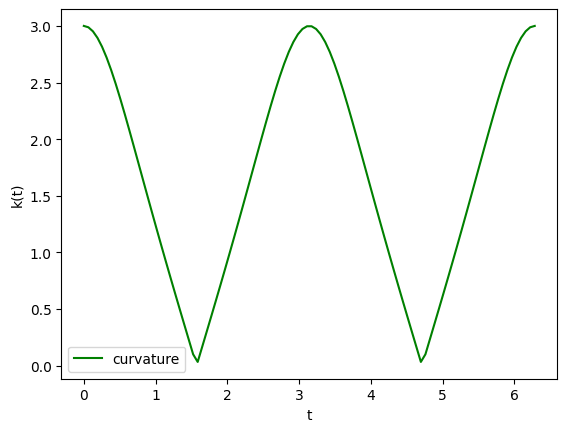

In [65]:
curvature_fn = sp.lambdify(t, curvature, 'numpy')
curvature_vals = curvature_fn(t_vals)

plt.plot(t_vals, curvature_vals, label='curvature', color='green')
plt.ylabel('k(t)')
plt.xlabel('t')
plt.legend()
plt.show()

### Point 4.3
- Evaluate the curve’s length.

In [66]:
da_norm    = info['norm_da']
da_norm_fn = sp.lambdify(t, da_norm, 'numpy')
da_norm

1/sqrt(sin(t)**2 + 1)

In [67]:
curve_length = calculate_curve_length(da_norm, t, start, end)
curve_length

elliptic_f(6.28318530717959, -1)

In [68]:
curve_length.evalf()

5.24411510858424

### Point 4.4

- Evaluate the rotation index. Use numerical integration if necessary. Interpret your result.

In [69]:
rotation_idx_result = calculate_rotation_index_from_non_parametric_numeric(curvature_fn, da_norm_fn, t, 0, np.pi)

print(f"Rotation index: {rotation_idx_result[0]}, error: {rotation_idx_result[1]}")

Rotation index: 4.71238898038469, error: 1.0720446752543467e-10


----------------
# Point 5

(0.6 points) (1.3 points) Show that torsion $\tau(t)$ for a non-arc length parameterized curve $\alpha(t)$ is given by:

$$\tau(t) = \frac{(\alpha'(t) \times \alpha''(t)) \cdot \alpha'''(t)}{\|\alpha'(t) \times \alpha''(t)\|^{2}}$$

Include the procedure in your notebook using $\LaTeX$.

----------------
# Point 6

(1 point) Consider the toroidal spiral curve:

$$\alpha(t) = ( (a + cos(\omega t)) cos(t),\; (a + cos(\omega t)) sin(t),\; sin(\omega t)),\;\; t \in [0, 2\pi]$$

In [83]:
t = sp.Symbol('t', real=True, positive=True)
a = sp.Symbol('a', real=True, positive=True)
omega = sp.Symbol('omega', real=True, positive=True)
start = 0
end   = 2*np.pi

# Parametric curve of torus
alpha = ( (a + sp.cos(omega*t))*sp.cos(t), (a + sp.cos(omega*t))*sp.sin(t), sp.sin(omega*t))
alpha

((a + cos(omega*t))*cos(t), (a + cos(omega*t))*sin(t), sin(omega*t))

### Point 6.1

- Evaluate the unit vectors $\vec{T}(t),\; \vec{N}(t),\; \vec{B}(t)$ for the curve $\alpha(t)$.

In [84]:
t_vals = np.linspace(start, end, 100)

In [85]:
info = get_all_from_parametric_curve_with_normalizations(alpha, t)
T = info['unit_da']
N = info['unit_dda']
B = info['unit_binorm_vec']

### Point 6.2

-  Evaluate and plot curvature $\kappa(t)$ and torsion $\tau(t)$ for $\alpha(t)$ when parameters are $a = 4$ and $\omega = 10$.

In [86]:
omega_val = 10 
a_val = 4 

k = info['k']
torsion = info['torsion']

# lambdify the curvature
k_fn = sp.lambdify(t, k.subs({omega: omega_val, a: a_val}), 'numpy')
k_vals = k_fn(t_vals)

# lambdify the torsion
torsion_fn = sp.lambdify(t, torsion.subs({omega: omega_val, a: a_val}), 'numpy')
torsion_vals = torsion_fn(t_vals)

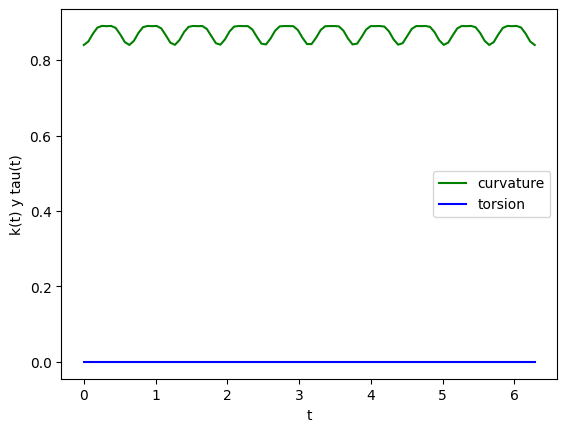

In [92]:
# lambdify the curvature
k_fn = sp.lambdify(t, k.subs({omega: omega_val, a: a_val}), 'numpy')
k_vals = k_fn(t_vals)

# lambdify the torsion
torsion_fn = sp.lambdify(t, torsion.subs({omega: omega_val, a: a_val}), 'numpy')
torsion_vals = torsion_fn(t_vals)

plt.plot(t_vals, k_vals, label='curvature', color='green')
plt.plot(t_vals, torsion_vals, label='torsion', color='blue')
plt.ylabel('k(t) y tau(t)')
plt.xlabel('t')
plt.legend()
plt.show()

### Point 6.3

- Add the vectors $\vec{T}(0),\; \vec{N}(0),\; \vec{B}(0)$ to the previous plot.